In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tqdm import tqdm, tqdm_notebook
import random
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers 
from tensorflow.keras.utils import to_categorical 
#from keras_tqdm import TQDMNotebookCallback
#
from tensorflow.keras.models import load_model
import h5py

# dont know if i need these
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.layers import Dropout
from numpy.random import seed

### Importing images from local pc

In [ ]:

#print(os.listdir("archive"))
artists = pd.read_csv('~/Documents/Jupiter/archive/artists.csv')
artists = artists.sort_values(by=['paintings'], ascending=False)
artists_ = artists['name'].str.replace(' ', '_').values
# Explore images of top artists

images_dir = 'archive/images/images'
artists_dirs = os.listdir(images_dir)
artists_[4] = "Al"
artists_subset = artists_[0:3]

for name in artists_:
    if os.path.exists(os.path.join(images_dir, name)):
        os.path.join(images_dir, name)

    else:
        print("Did not find -->", os.path.join(images_dir, name))
        print(name)
        

FileNotFoundError: ignored

### Importing images from drive

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

!unzip -q "/content/gdrive/MyDrive/three.zip" -d file_destination

#print(os.listdir("archive"))
artists = pd.read_csv('/content/file_destination/artists.csv')
artists = artists.sort_values(by=['paintings'], ascending=False)
artists_ = artists['name'].str.replace(' ', '_').values
# Explore images of top artists

images_dir = '/content/file_destination'
artists_subset = artists_[0:3]

artists_dirs = os.listdir(images_dir)
artists_[4] = "Al"

for name in artists_subset:
    if os.path.exists(os.path.join(images_dir, name)):
        os.path.join(images_dir, name)

    else:
        print("Did not find -->", os.path.join(images_dir, name))
        print(name)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
replace file_destination/Edgar_Degas/Edgar_Degas_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Art from the three artists

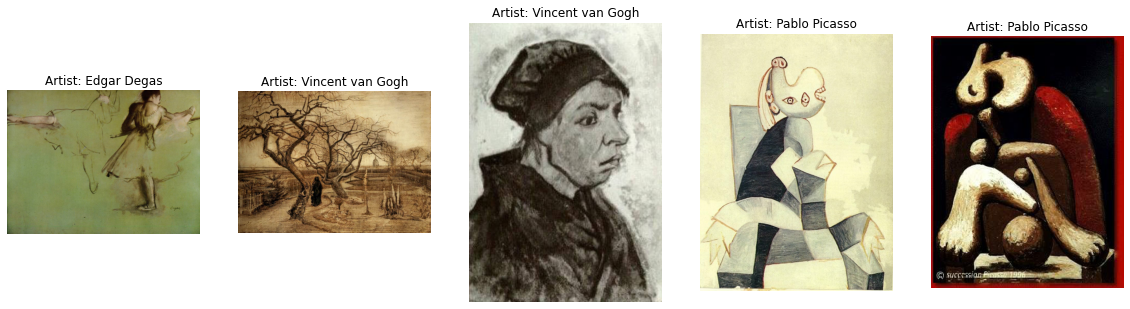

In [ ]:
n = 5
fig, axes = plt.subplots(1, n, figsize=(20,10))

for i in range(n):
    random_artist = random.choice(artists_subset)
    random_image = random.choice(os.listdir(os.path.join(images_dir, random_artist)))
    random_image_file = os.path.join(images_dir, random_artist, random_image)
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    axes[i].set_title("Artist: " + random_artist.replace('_', ' '))
    axes[i].axis('off')

plt.show()

## Splitting and scaling the data

In [10]:
artists_subset = artists_[0:3]
batch_size = 16
train_input_shape = (224, 224, 3)

# I use the same seed 
train_gen = ImageDataGenerator(validation_split=0.10, rescale=1./255., vertical_flip= True, horizontal_flip=True)

test_gen = ImageDataGenerator(validation_split=0.10, rescale=1./255.)

train_subset = train_gen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=artists_subset.tolist(),
                                                    seed = 42
                                                   )

test_subset = test_gen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="validation",
                                                    shuffle=True,
                                                    classes=artists_subset.tolist(),
                                                    seed = 42
                                                   )

#train = train_datagen.flow_from_directory(directory=images_dir,
                                                    #class_mode='categorical',
                                                    #target_size=train_input_shape[0:2],
                                                    #batch_size=batch_size,
                                                    #subset="training",
                                                    #shuffle=True,
                                                    #classes=artists_.tolist()
                                                   #)

#test = train_datagen.flow_from_directory(directory=images_dir,
                                                    #class_mode='categorical',
                                                    #target_size=train_input_shape[0:2],
                                                    #batch_size=batch_size,
                                                    #subset="validation",
                                                    #shuffle=True,
                                                    #classes=artists_.tolist()
                                                   #)

Found 1818 images belonging to 3 classes.
Found 200 images belonging to 3 classes.


## A simple convolutional neural network

In [11]:

nr_classes = artists_.shape[0]

nr_classes_subset = len(artists_subset)

epochs = 5

receptive_field = 5

n_filters = 128

n_neurons_connected = 50

eta = 0.1

lmbd = 0

In [ ]:
model_s = Sequential()
    
model_s.add(layers.Conv2D(n_filters, (receptive_field, receptive_field), input_shape=train_input_shape, padding='same',
              activation='sigmoid', kernel_regularizer=regularizers.l2(lmbd), name = 'conv'))

model_s.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool'))

model_s.add(layers.Flatten())

model_s.add(layers.Dense(nr_classes_subset, activation='softmax', kernel_regularizer=regularizers.l2(lmbd), name = '3_class'))  

adam = optimizers.Adam(learning_rate=eta)

model_s.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
model_s.fit(train_subset, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/5
114/114 [==============================] - 31s 269ms/step - loss: 859.0959 - accuracy: 0.2970
Epoch 2/5
114/114 [==============================] - 32s 276ms/step - loss: 14.9570 - accuracy: 0.4571
Epoch 3/5
114/114 [==============================] - 31s 275ms/step - loss: 7.1339 - accuracy: 0.5226
Epoch 4/5
114/114 [==============================] - 31s 274ms/step - loss: 3.0484 - accuracy: 0.6139
Epoch 5/5
114/114 [==============================] - 31s 275ms/step - loss: 5.5116 - accuracy: 0.5798


In [ ]:
results = model_s.evaluate(test_subset, verbose = 0)
print(results)
model_s.save_weights('first_model_weights.h5')

[10.960745811462402, 0.5299999713897705]


**Testing for optimal learning rate and lambda parameter**


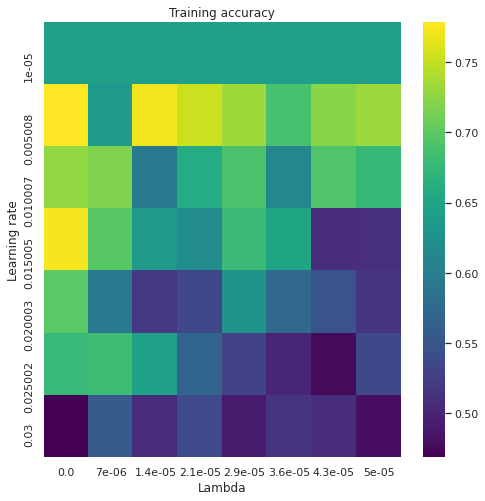

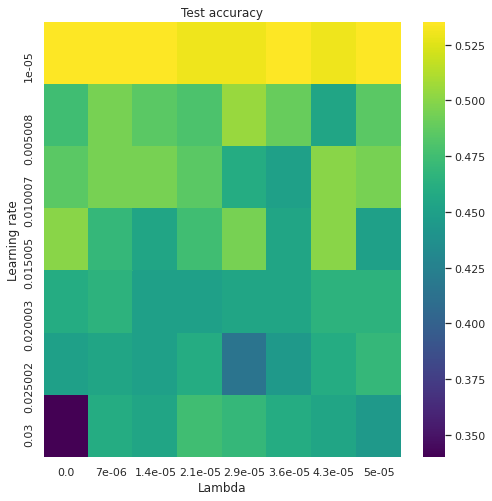

In [ ]:
learning_rates = np.linspace(0.00001, 0.03, num=7)
lambdas = np.linspace(0.000000001, 0.00005, num=8)

epochs = 10
sns.set()

training_accuracy = np.zeros((len(learning_rates), len(lambdas)))
test_accuracy = np.zeros((len(learning_rates), len(lambdas)))
 model_new.evaluate(train_subset, verbose = 0)[1]

for i in range(len(learning_rates)):
    for j in range(len(lambdas)):
        
        
        # Variables
        adam = optimizers.Adam(learning_rate=learning_rates[i])
        lamb = lambdas[j]
        
        
        # The same model as before
        model_new = Sequential()
        model_new.add(layers.Conv2D(n_filters, (receptive_field, receptive_field), input_shape=train_input_shape, padding='same',
              activation='sigmoid', kernel_regularizer=regularizers.l2(lamb), name = 'conv'))
        model_new.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool'))
        model_new.add(layers.Flatten())
        model_new.add(layers.Dense(nr_classes_subset, activation='softmax', kernel_regularizer=regularizers.l2(lamb), name = '3_class'))  
        model_new.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
        #model_new.load_weights('first_model_weights.h5', by_name=True)
        model_new.load_weights('/content/gdrive/MyDrive/weights/first_model_weights.h5', by_name=True)  
        
        model_new.fit(train_subset, epochs=epochs, batch_size=batch_size, verbose=0)
        
        training_accuracy[i][j] = model_new.evaluate(train_subset, verbose = 0)[1]
        test_accuracy[i][j] = model_new.evaluate(test_subset, verbose = 0)[1]

        
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(training_accuracy, xticklabels=lambdas.round(6), yticklabels= learning_rates.round(6), ax=ax, cmap="viridis")
ax.set_title("Training accuracy")
ax.set_ylabel("Learning rate")
ax.set_xlabel("Lambda")
plt.show()

fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(test_accuracy, ax=ax, cmap="viridis" ,xticklabels=lambdas.round(6), yticklabels= learning_rates.round(6))
ax.set_title("Test accuracy")
ax.set_ylabel("Learning rate")
ax.set_xlabel("Lambda")
plt.show()


Shallow neural network with sigmoid

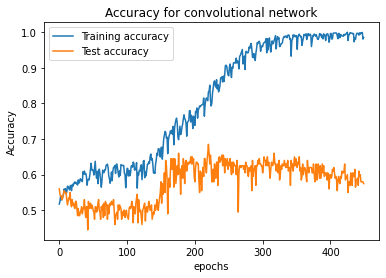

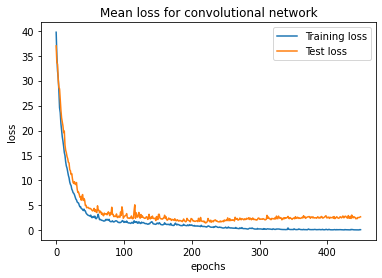

In [ ]:
epochs = 450
adam = optimizers.Adam(learning_rate=0.001)
lmbd = 0.00005



model_s = Sequential()  
model_s.add(layers.Conv2D(n_filters, (receptive_field, receptive_field), input_shape=train_input_shape, padding='same',
              activation='sigmoid', kernel_regularizer=regularizers.l2(lmbd), name = 'conv'))
model_s.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool'))
model_s.add(layers.Flatten())
model_s.add(layers.Dense(nr_classes_subset, activation='softmax', kernel_regularizer=regularizers.l2(lmbd), name = '3_class'))  
model_s.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model_s.load_weights('/content/gdrive/MyDrive/weights/first_model_weights.h5', by_name=True)  


hist = model_s.fit_generator(train_subset, epochs=epochs, validation_data = test_subset, shuffle = True, verbose=0)
model_s.save_weights('trained_model_s.h5')

train_loss = hist.history['loss']
val_loss   = hist.history['val_loss']
train_acc  = hist.history['accuracy']
val_acc    = hist.history['val_accuracy']
xc         = range(epochs)

plt.figure()
plt.plot(xc, train_acc, label = 'Training accuracy')
plt.plot(xc, val_acc, label = 'Test accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy for convolutional network')
plt.show()

plt.figure()
plt.plot(xc, train_loss, label = 'Training loss')
plt.plot(xc, val_loss, label = 'Test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Mean loss for convolutional network')
plt.show()

Shallow convolution network with relu

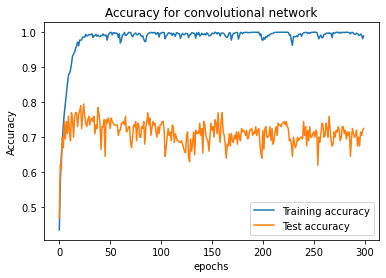

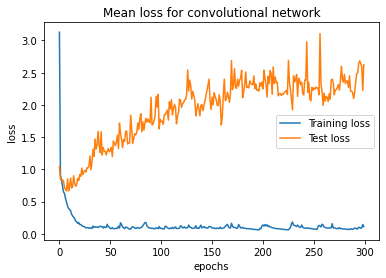

In [ ]:
epochs = 300
adam = optimizers.Adam(learning_rate=0.001)
lmbd = 0.00005



model_relu = Sequential()  
model_relu.add(layers.Conv2D(n_filters, (receptive_field, receptive_field), input_shape=train_input_shape, padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lmbd), name = 'conv'))
model_relu.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool'))
model_relu.add(layers.Flatten())
model_relu.add(layers.Dense(nr_classes_subset, activation='softmax', kernel_regularizer=regularizers.l2(lmbd), name = '3_class'))  
model_relu.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#model_relu.load_weights('/content/trained_model_relu.h5', by_name=True)  


hist = model_relu.fit_generator(train_subset, epochs=epochs, validation_data = test_subset, shuffle = True, verbose=0)
model_relu.save_weights('/content/gdrive/MyDrive/weights/trained_model_relu.h5')

train_loss = hist.history['loss']
val_loss   = hist.history['val_loss']
train_acc  = hist.history['accuracy']
val_acc    = hist.history['val_accuracy']
xc         = range(epochs)

plt.figure()
plt.plot(xc, train_acc, label = 'Training accuracy')
plt.plot(xc, val_acc, label = 'Test accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy for convolutional network')
plt.show()

plt.figure()
plt.plot(xc, train_loss, label = 'Training loss')
plt.plot(xc, val_loss, label = 'Test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Mean loss for convolutional network')
plt.show()

Shallow convolutional network with avarage pooling

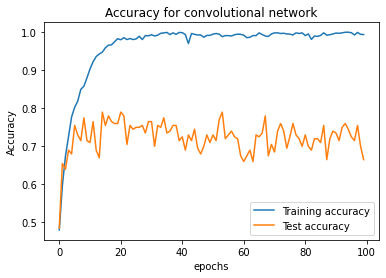

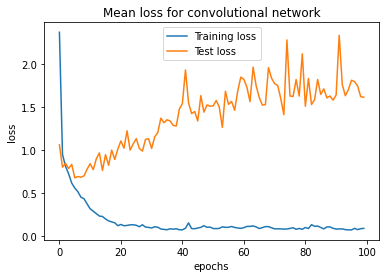

In [ ]:
epochs = 100
adam = optimizers.Adam(learning_rate=0.001)
lmbd = 0.00005



model_avarage = Sequential()  
model_avarage.add(layers.Conv2D(n_filters, (receptive_field, receptive_field), input_shape=train_input_shape, padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lmbd), name = 'conv'))
model_avarage.add(layers.AveragePooling2D(pool_size=(2, 2), name = 'avaragePool'))
model_avarage.add(layers.Flatten())
model_avarage.add(layers.Dense(nr_classes_subset, activation='softmax', kernel_regularizer=regularizers.l2(lmbd), name = '3_class'))  
model_avarage.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#model_relu.load_weights('/content/trained_model_relu.h5', by_name=True)  


hist = model_avarage.fit_generator(train_subset, epochs=epochs, validation_data = test_subset, shuffle = True, verbose=0)
model_avarage.save_weights('/content/gdrive/MyDrive/weights/trained_model_avarage.h5')

train_loss = hist.history['loss']
val_loss   = hist.history['val_loss']
train_acc  = hist.history['accuracy']
val_acc    = hist.history['val_accuracy']
xc         = range(epochs)

plt.figure()
plt.plot(xc, train_acc, label = 'Training accuracy')
plt.plot(xc, val_acc, label = 'Test accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy for convolutional network')
plt.show()

plt.figure()
plt.plot(xc, train_loss, label = 'Training loss')
plt.plot(xc, val_loss, label = 'Test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Mean loss for convolutional network')
plt.show()

Deep convolutional network with ReLU

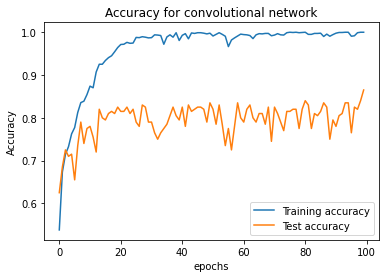

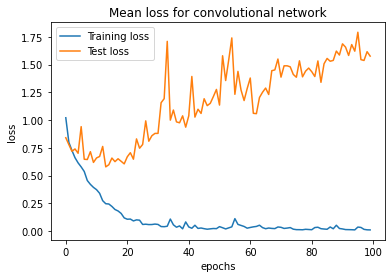

In [ ]:
adam = optimizers.Adam(learning_rate=0.0001) 
lamb = 0.0001 
 
epochs = 100
n_filters = 128

        

model_x_relu = Sequential()

# Fist convolutional layer
model_x_relu.add(layers.Conv2D(n_filters, (receptive_field, receptive_field), input_shape=train_input_shape, padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lamb), name = 'conv'))
model_x_relu.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool'))

# Second convolutional layer
model_x_relu.add(layers.Conv2D(n_filters/2, (receptive_field, receptive_field), padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lamb), name = 'conv2'))
model_x_relu.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool2'))

# fully connected layer
model_x_relu.add(layers.Flatten())
model_x_relu.add(Dense(75))

# Output
model_x_relu.add(layers.Dense(nr_classes_subset, activation='softmax', kernel_regularizer=regularizers.l2(lamb), name = '3_class'))  
model_x_relu.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

#model_x.load_weights('/content/gdrive/MyDrive/weights/x_weights_relu.h5', by_name=True)  # Må byttes

hist = model_x_relu.fit_generator(train_subset, epochs=epochs, validation_data = test_subset, shuffle = True, verbose=0)
model_x_relu.save_weights('/content/gdrive/MyDrive/weights/x_weights_relu.h5')


train_loss = hist.history['loss']
val_loss   = hist.history['val_loss']
train_acc  = hist.history['accuracy']
val_acc    = hist.history['val_accuracy']
xc         = range(epochs)

plt.figure()
plt.plot(xc, train_acc, label = 'Training accuracy')
plt.plot(xc, val_acc, label = 'Test accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy for convolutional network')
plt.show()

plt.figure()
plt.plot(xc, train_loss, label = 'Training loss')
plt.plot(xc, val_loss, label = 'Test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Mean loss for convolutional network')
plt.show()

Deep Neural network with Sigmoid

Instructions for updating:
Please use Model.fit, which supports generators.


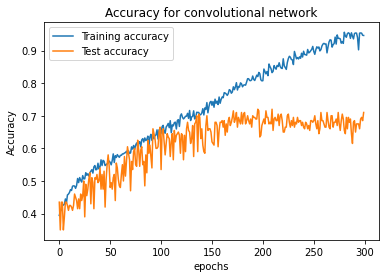

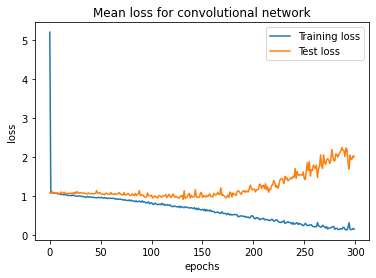

In [ ]:
adam = optimizers.Adam(learning_rate=0.0001) 
lamb = 0.00006 
 
epochs = 300
n_filters = 128


model_x = Sequential()

# First convolutional layer
model_x.add(layers.Conv2D(n_filters, (receptive_field, receptive_field), input_shape=train_input_shape, padding='same',
              activation='sigmoid', kernel_regularizer=regularizers.l2(lamb), name = 'conv'))
model_x.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool'))

# Second convolutional layer
model_x.add(layers.Conv2D(n_filters/2, (receptive_field, receptive_field), padding='same',
              activation='sigmoid', kernel_regularizer=regularizers.l2(lamb), name = 'conv2'))
model_x.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool2'))

# Fully connected layer
model_x.add(layers.Flatten())
model_x.add(Dense(75))

# Output
model_x.add(layers.Dense(nr_classes_subset, activation='softmax', kernel_regularizer=regularizers.l2(lamb), name = '3_class'))  
model_x.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

#model_x.load_weights('/content/gdrive/MyDrive/weights/x_weights_2.h5', by_name=True)  # Må byttes

hist = model_x.fit_generator(train_subset, epochs=epochs, validation_data = test_subset, shuffle = True, verbose=0)
model_x.save_weights('/content/gdrive/MyDrive/weights/x_weights_2.h5')


train_loss = hist.history['loss']
val_loss   = hist.history['val_loss']
train_acc  = hist.history['accuracy']
val_acc    = hist.history['val_accuracy']
xc         = range(epochs)

plt.figure()
plt.plot(xc, train_acc, label = 'Training accuracy')
plt.plot(xc, val_acc, label = 'Test accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy for convolutional network')
plt.show()

plt.figure()
plt.plot(xc, train_loss, label = 'Training loss')
plt.plot(xc, val_loss, label = 'Test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Mean loss for convolutional network')
plt.show()

**Data augmentation **

In [12]:
complex_gen = ImageDataGenerator(validation_split=0.10, rescale=1./255., vertical_flip= True, horizontal_flip=True, 
                                 rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, 
                                 shear_range=10, zoom_range=0.1, channel_shift_range=0.1)


complex_aug = complex_gen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=artists_subset.tolist(),
                                                    seed = 42
                                                   )
 
no_aug = test_gen.flow_from_directory(directory=images_dir,
                                                    class_mode='categorical',
                                                    target_size=train_input_shape[0:2],
                                                    batch_size=batch_size,
                                                    subset="training",
                                                    shuffle=True,
                                                    classes=artists_subset.tolist(),
                                                    seed = 42
                                                   )         

Found 1818 images belonging to 3 classes.
Found 1818 images belonging to 3 classes.


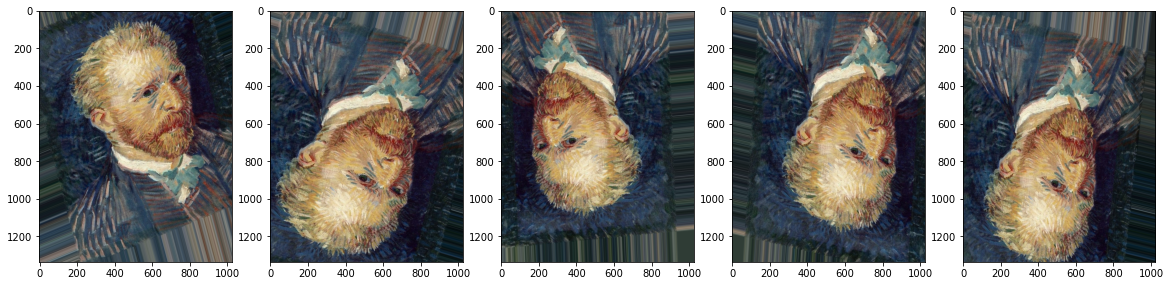

In [ ]:
img = plt.imread('/content/file_destination/Vincent_van_Gogh/Vincent_van_Gogh_1.jpg')
#data = img_to_array(img)
#samples = expand_dims(img, 0)

it = complex_gen.flow(np.expand_dims(img, axis=0), batch_size=1)
n = 5
fig, axes = plt.subplots(1, n, figsize=(20,10))

for i in range(n):
    
    axes[i].imshow(it.next()[0])
  
plt.show()

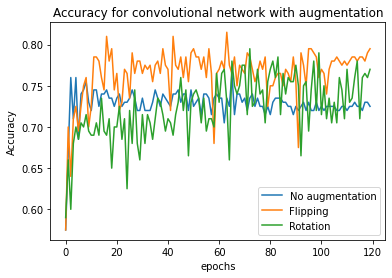

In [13]:
adam = optimizers.Adam(learning_rate=0.0001) 
lamb = 0.00006
 
epochs = 120
n_filters = 128
receptive_field = 5

        
# The same model as before - but we change to SDG
model_aug = Sequential()

# 2 convolutional layers
model_aug.add(layers.Conv2D(n_filters, (receptive_field, receptive_field), input_shape=train_input_shape, padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lamb), name = 'conv'))
model_aug.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool'))

model_aug.add(layers.Conv2D(n_filters/2, (receptive_field, receptive_field), padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lamb), name = 'conv2'))
model_aug.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool2'))

# Fully connected layer
model_aug.add(layers.Flatten())
model_aug.add(Dense(75))
model_aug.add(layers.Dense(nr_classes_subset, activation='softmax', kernel_regularizer=regularizers.l2(lamb), name = '3_class'))  
model_aug.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# No augementaion 
no_augmentation = model_aug.fit_generator(no_aug, epochs=epochs, validation_data = test_subset, shuffle = True, verbose=0)
model_aug.save_weights('/content/gdrive/MyDrive/weights/no_aug.h5')
model_aug.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Vertical and horizontal flipping
flipping = model_aug.fit_generator(train_subset, epochs=epochs, validation_data = test_subset, shuffle = True, verbose=0)
model_aug.save_weights('/content/gdrive/MyDrive/weights/with_aug.h5')
model_aug.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Additional augmentation factors
complex_augmentation = model_aug.fit_generator(complex_aug, epochs=epochs, validation_data = test_subset, shuffle = True, verbose=0)
model_aug.save_weights('/content/gdrive/MyDrive/weights/alot_of_aug.h5')

val_acc_no    = no_augmentation.history['val_accuracy']
val_acc_f    = flipping.history['val_accuracy']
val_acc_c    = complex_augmentation.history['val_accuracy']
xc         = range(epochs)


plt.figure()
plt.plot(xc, val_acc_no, label = 'No augmentation')
plt.plot(xc, val_acc_f, label = 'Flipping')
plt.plot(xc, val_acc_c, label = 'Rotation')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy for convolutional network with augmentation')
plt.show()



**Dropout**

Instructions for updating:
Please use Model.fit, which supports generators.


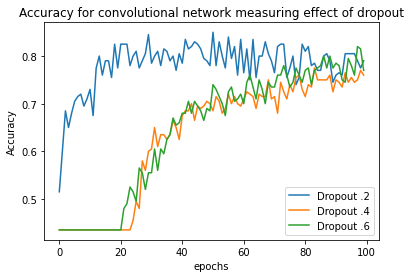

In [ ]:

adam = optimizers.Adam(learning_rate=0.0001) 
lamb = 0.00006
 
epochs = 100
n_filters = 128

drop = [0.2,0.4,0.6]
        
for d in drop:
  dropout = Sequential()

  dropout.add(layers.Conv2D(n_filters, (receptive_field, receptive_field), input_shape=train_input_shape, padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lamb), name = 'conv'))
  dropout.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool'))
  dropout.add(Dropout(d))


  dropout.add(layers.Conv2D(n_filters/2, (receptive_field, receptive_field), padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lamb), name = 'conv2'))
  dropout.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool2'))
  dropout.add(Dropout(d))

  dropout.add(layers.Flatten())
  dropout.add(Dense(75))
  dropout.add(layers.Dense(nr_classes_subset, activation='softmax', kernel_regularizer=regularizers.l2(lamb), name = '3_class')) 

  dropout.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  dropout.save_weights('reset.h5')


  if (d == 0.2):
    hist1 = dropout.fit_generator(train_subset, epochs=epochs, validation_data = test_subset, shuffle = True, verbose=0)
    dropout.save_weights('/content/gdrive/MyDrive/weights/drop2.h5')
  if (d == 0.4):
    hist2 = dropout.fit_generator(train_subset, epochs=epochs, validation_data = test_subset, shuffle = True, verbose=0)
    dropout.save_weights('/content/gdrive/MyDrive/weights/drop4.h5')
  if (d == 0.6):
    hist3 = dropout.fit_generator(train_subset, epochs=epochs, validation_data = test_subset, shuffle = True, verbose=0)
    dropout.save_weights('/content/gdrive/MyDrive/weights/drop6.h5')



val_acc_1    = hist1.history['val_accuracy']
val_acc_2    = hist2.history['val_accuracy']
val_acc_3    = hist3.history['val_accuracy']
xc         = range(epochs)

plt.figure()
plt.plot(xc, val_acc_1, label = 'Dropout .2')
plt.plot(xc, val_acc_2, label = 'Dropout .4')
plt.plot(xc, val_acc_3, label = 'Dropout .6')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy for convolutional network measuring effect of dropout')
plt.show()

**10x10 kernel**

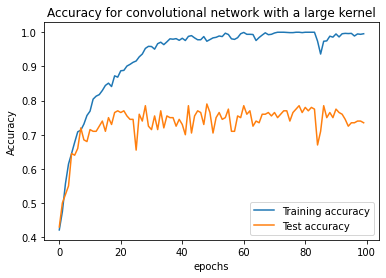

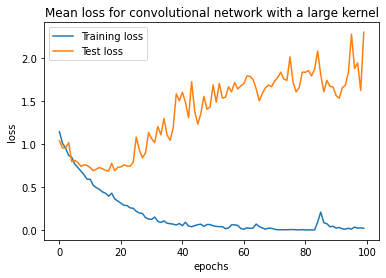

In [ ]:
adam = optimizers.Adam(learning_rate=0.0001) 
lamb = 0.00006 
 
epochs = 100
n_filters = 128
receptive_field = 10
        
# The same model as before - but we change to 10 x 10 receptive fields
large_kernel = Sequential()
large_kernel.add(layers.Conv2D(n_filters, (receptive_field, receptive_field), input_shape=train_input_shape, padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lamb), name = 'conv'))

large_kernel.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool'))

large_kernel.add(layers.Conv2D(n_filters/2, (receptive_field, receptive_field), padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lamb), name = 'conv2'))
large_kernel.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool2'))


large_kernel.add(layers.Flatten())
large_kernel.add(Dense(75))
large_kernel.add(layers.Dense(nr_classes_subset, activation='softmax', kernel_regularizer=regularizers.l2(lamb), name = '3_class'))  
large_kernel.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


#Training the model 
hist = large_kernel.fit_generator(train_subset, epochs=epochs, validation_data = test_subset, shuffle = True, verbose=0)
large_kernel.save_weights('/content/gdrive/MyDrive/weights/large_kernel.h5')



train_loss = hist.history['loss']
val_loss   = hist.history['val_loss']
train_acc  = hist.history['accuracy']
val_acc    = hist.history['val_accuracy']
xc         = range(epochs)

plt.figure()
plt.plot(xc, train_acc, label = 'Training accuracy')
plt.plot(xc, val_acc, label = 'Test accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy for convolutional network with a large kernel')
plt.show()

plt.figure()
plt.plot(xc, train_loss, label = 'Training loss')
plt.plot(xc, val_loss, label = 'Test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Mean loss for convolutional network with a large kernel')
plt.show()

In [ ]:
from scipy import signal
from scipy import ndimage
from PIL import Image


adam = optimizers.Adam(learning_rate=0.0001) 
lamb = 0.0001 
 
epochs = 40
n_filters = 1
receptive_field = 5
        

three = Sequential()

# Fist convolutional layer
three.add(layers.Conv2D(n_filters, (receptive_field, receptive_field), input_shape=train_input_shape, padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lamb), name = 'conv'))
three.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool'))

three.add(layers.Flatten())
three.add(Dense(75))

# Output
three.add(layers.Dense(nr_classes_subset, activation='softmax', kernel_regularizer=regularizers.l2(lamb), name = '3_class'))  
three.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

#model_x.load_weights('/content/gdrive/MyDrive/weights/x_weights_relu.h5', by_name=True)  # Må byttes

hist = three.fit_generator(train_subset, epochs=epochs, validation_data = test_subset, shuffle = True, verbose=0)
three.save_weights('/content/gdrive/MyDrive/weights/three.h5')

first_layer_weights = three.layers[0].get_weights()[0]

img_1 = plt.imread('/content/file_destination/Vincent_van_Gogh/Vincent_van_Gogh_224.jpg')
img_2 = plt.imread('/content/file_destination/Pablo_Picasso/Pablo_Picasso_128.jpg')
img_3 = plt.imread('/content/file_destination/Pablo_Picasso/Pablo_Picasso_99.jpg')
img_4 = plt.imread('/content/file_destination/Edgar_Degas/Edgar_Degas_536.jpg')

grad_1 = ndimage.convolve(img_1, first_layer_weights[0])
grad_2 = ndimage.convolve(img_2, first_layer_weights[0])
grad_3 = ndimage.convolve(img_3, first_layer_weights[0])
grad_4 = ndimage.convolve(img_4, first_layer_weights[0])

im1 = Image.fromarray(grad_1, 'RGB').save('/content/gdrive/MyDrive/ima/vin.png')
im2 = Image.fromarray(grad_2, 'RGB').save('/content/gdrive/MyDrive/ima/pab.png')
im3 = Image.fromarray(grad_3, 'RGB').save('/content/gdrive/MyDrive/ima/pab2.png')
im4 = Image.fromarray(grad_4, 'RGB').save('/content/gdrive/MyDrive/ima/edg.png')


**Batch normalization**

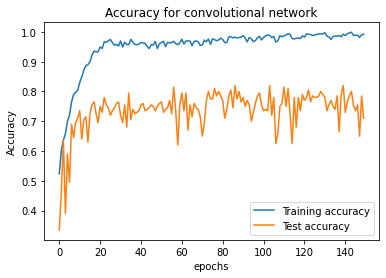

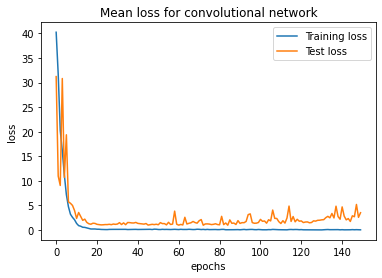

In [ ]:
adam = optimizers.Adam(learning_rate=0.0003) 
lamb = 0.00003
 
epochs = 150
n_filters = 128

        

batch_norm = Sequential()

# Fist convolutional layer
batch_norm.add(layers.Conv2D(n_filters, (receptive_field, receptive_field), input_shape=train_input_shape, padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lamb), name = 'conv'))
batch_norm.add(BatchNormalization())
batch_norm.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool'))

# Second convolutional layer
batch_norm.add(layers.Conv2D(n_filters/2, (receptive_field, receptive_field), padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lamb), name = 'conv2'))
batch_norm.add(BatchNormalization())
batch_norm.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool2'))

# fully connected layer
batch_norm.add(layers.Flatten())
batch_norm.add(Dense(75))

# Output
batch_norm.add(layers.Dense(nr_classes_subset, activation='softmax', kernel_regularizer=regularizers.l2(lamb), name = '3_class'))  
batch_norm.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

#model_x.load_weights('/content/gdrive/MyDrive/weights/batch_norm.h5', by_name=True)  # Må byttes

hist = batch_norm.fit_generator(train_subset, epochs=epochs, validation_data = test_subset, shuffle = True, verbose=0)
batch_norm.save_weights('/content/gdrive/MyDrive/weights/batch_norm.h5')


train_loss = hist.history['loss']
val_loss   = hist.history['val_loss']
train_acc  = hist.history['accuracy']
val_acc    = hist.history['val_accuracy']
xc         = range(epochs)

plt.figure()
plt.plot(xc, train_acc, label = 'Training accuracy')
plt.plot(xc, val_acc, label = 'Test accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy for convolutional network')
plt.show()

plt.figure()
plt.plot(xc, train_loss, label = 'Training loss')
plt.plot(xc, val_loss, label = 'Test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Mean loss for convolutional network')
plt.show()







No regularization plus dropout

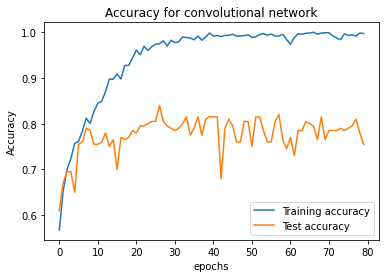

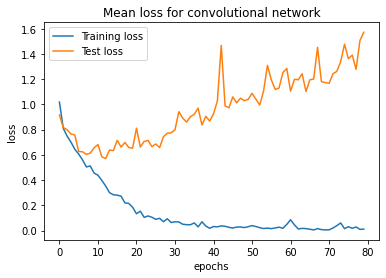

In [ ]:
adam = optimizers.Adam(learning_rate=0.0001) 
lamb = 0.0006
 
epochs = 80
n_filters = 128

        

model_x_relu = Sequential()


# Fist convolutional layer
model_x_relu.add(layers.Conv2D(n_filters, (receptive_field, receptive_field), input_shape=train_input_shape, padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lamb), name = 'conv'))
model_x_relu.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool'))
model_x_relu.add(Dropout(0.15))

# Second convolutional layer
model_x_relu.add(layers.Conv2D(n_filters/2, (receptive_field, receptive_field), padding='same',
              activation='relu', kernel_regularizer=regularizers.l2(lamb), name = 'conv2'))
model_x_relu.add(layers.MaxPooling2D(pool_size=(2, 2), name = 'maxPool2'))
model_x_relu.add(Dropout(0.15))

# fully connected layer
model_x_relu.add(layers.Flatten())
model_x_relu.add(Dense(75))
model_x_relu.add(Dropout(0.15))

# Output
model_x_relu.add(layers.Dense(nr_classes_subset, activation='softmax', kernel_regularizer=regularizers.l2(lamb), name = '3_class'))  
model_x_relu.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


hist = model_x_relu.fit_generator(train_subset, epochs=epochs, validation_data = test_subset, shuffle = True, verbose=0)
#model_x_relu.save_weights('/content/gdrive/MyDrive/weights/x_weights_relu.h5')

train_loss = hist.history['loss']
val_loss   = hist.history['val_loss']
train_acc  = hist.history['accuracy']
val_acc    = hist.history['val_accuracy']
xc         = range(epochs)

plt.figure()
plt.plot(xc, train_acc, label = 'Training accuracy')
plt.plot(xc, val_acc, label = 'Test accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy for convolutional network')
plt.show()

plt.figure()
plt.plot(xc, train_loss, label = 'Training loss')
plt.plot(xc, val_loss, label = 'Test loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Mean loss for convolutional network')
plt.show()